In [ ]:
import pickle
with open('my_Canada_pred_model.pickle','rb') as f:
    my_model = pickle.load(f)

In [ ]:
import warnings
warnings.filterwarnings('ignore')
my_model.predict([[2029]])[0]

In [34]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,MinMaxScaler,StandardScaler,OrdinalEncoder

In [2]:
import pandas as pd

In [11]:
df = pd.DataFrame({'City':['Noida','Delhi','Lucknow','Ranchi'],
             'Price':[23,34,45,56]})
df

,City,Price
0,Noida,23
1,Delhi,34
2,Lucknow,45
3,Ranchi,56


In [12]:
get_df = pd.get_dummies(df['City'],drop_first=True)
get_df

,Lucknow,Noida,Ranchi
0,0,1,0
1,0,0,0
2,1,0,0
3,0,0,1


In [14]:
final_df = pd.concat([df,get_df],axis=1).drop('City',axis=1)
final_df

,Price,Lucknow,Noida,Ranchi
0,23,0,1,0
1,34,0,0,0
2,45,1,0,0
3,56,0,0,1


In [15]:
df

,City,Price
0,Noida,23
1,Delhi,34
2,Lucknow,45
3,Ranchi,56


In [22]:
ohe = OneHotEncoder(drop='first')
pd.DataFrame(ohe.fit_transform(df[['City']]).toarray())

,0,1,2
0,0.0,1.0,0.0
1,0.0,0.0,0.0
2,1.0,0.0,0.0
3,0.0,0.0,1.0


In [23]:
le = LabelEncoder()

In [24]:
le.fit_transform(df['City'])

array([2, 0, 1, 3])

In [32]:
# map(,df['City'])

In [33]:
[{'Noida':0,'Delhi':1,'Lucknow':2,'Ranchi':3}[i] for i in df['City']]

[0, 1, 2, 3]

In [40]:
ordd = ['S','M','L','X',"XL",'XXL']
import random
df = pd.DataFrame({"Size":[random.choice(ordd) for i in range(15)],
             'Price':[random.randint(50,75) for i in range(15)]})

df

,Size,Price
0,X,52
1,L,53
2,S,68
3,XXL,64
4,S,72
5,L,55
6,XXL,65
7,X,64
8,L,59
9,S,55


In [44]:
oe = OrdinalEncoder(categories=[ordd])

In [46]:
df['Sizes'] = oe.fit_transform(df[['Size']])

In [47]:
df

,Size,Price,Sizes
0,X,52,3.0
1,L,53,2.0
2,S,68,0.0
3,XXL,64,5.0
4,S,72,0.0
5,L,55,2.0
6,XXL,65,5.0
7,X,64,3.0
8,L,59,2.0
9,S,55,0.0


In [52]:
ordd = ['S','M','L','X',"XL",'XXL']
num = range(len(ordd))
df['Order'] = df['Size'].map(dict(zip(ordd,num)))

In [53]:
df

,Size,Price,Sizes,Order
0,X,52,3.0,3
1,L,53,2.0,2
2,S,68,0.0,0
3,XXL,64,5.0,5
4,S,72,0.0,0
5,L,55,2.0,2
6,XXL,65,5.0,5
7,X,64,3.0,3
8,L,59,2.0,2
9,S,55,0.0,0


In [55]:
# cgpa,score,placed

In [74]:
df = pd.read_csv(r"C:\Users\Lenovo\Downloads\collegePlace.csv")
df1 = pd.read_csv(r"C:\Users\Lenovo\Downloads\Placement.csv")

df

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1
...,...,...,...,...,...,...,...,...
2961,23,Male,Information Technology,0,7,0,0,0
2962,23,Male,Mechanical,1,7,1,0,0
2963,22,Male,Information Technology,1,7,0,0,0
2964,22,Male,Computer Science,1,7,0,0,0


In [75]:
import seaborn as sns

In [76]:
# sns.scatterplot(x=df['CGPA'],y=df['HistoryOfBacklogs'],data=df)

In [77]:
X = df[['CGPA','HistoryOfBacklogs']]
X

,CGPA,HistoryOfBacklogs
0,8,1
1,7,1
2,6,0
3,8,1
4,8,0
...,...,...
2961,7,0
2962,7,0
2963,7,0
2964,7,0


In [78]:
y = df['PlacedOrNot']
y

0       1
1       1
2       1
3       1
4       1
       ..
2961    0
2962    0
2963    0
2964    0
2965    1
Name: PlacedOrNot, Length: 2966, dtype: int64

In [79]:
from sklearn.linear_model import LogisticRegression

In [80]:
model = LogisticRegression()

In [81]:
model.fit(X,y)

LogisticRegression()

In [82]:
model.score(X,y)

0.6793661496965611

In [83]:
# pip install mlxtend

In [84]:
from mlxtend.plotting import plot_decision_regions

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


<Axes: >

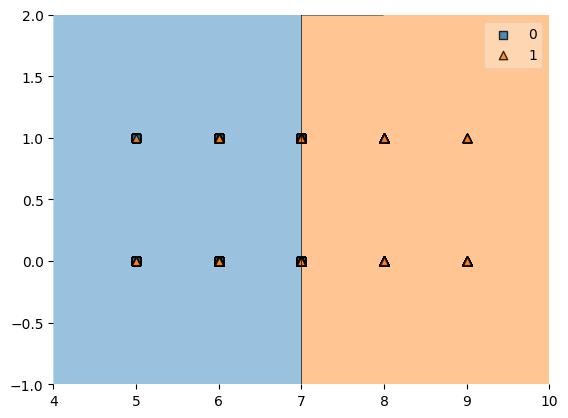

In [85]:
plot_decision_regions(X.to_numpy(),y.to_numpy(),clf=model)

In [86]:
df1

,Student_ID,CGPA,IQ,Placement
0,1,6.8,123,1
1,2,5.9,106,0
2,3,5.3,121,0
3,4,7.4,132,1
4,5,5.8,142,0
...,...,...,...,...
95,96,4.3,200,0
96,97,4.4,42,0
97,98,6.7,182,1
98,99,6.3,103,1


In [87]:
from sklearn.model_selection import train_test_split

In [89]:
X = df1.iloc[:,1:-1]
X

,CGPA,IQ
0,6.8,123
1,5.9,106
2,5.3,121
3,7.4,132
4,5.8,142
...,...,...
95,4.3,200
96,4.4,42
97,6.7,182
98,6.3,103


In [90]:
y = df1['Placement']
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: Placement, Length: 100, dtype: int64

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=4)

In [96]:
model = LogisticRegression()

In [97]:
model.fit(X_train,y_train)

LogisticRegression()

In [98]:
model.score(X_test,y_test)

0.9

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


<Axes: >

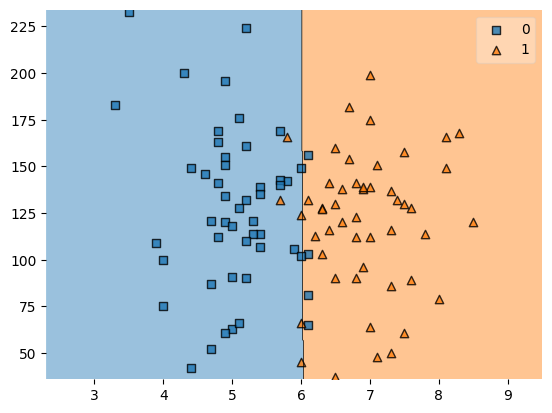

In [99]:
plot_decision_regions(X.to_numpy(),y.to_numpy(),clf=model)

https://github.com/YBI-Foundation/Dataset/blob/main/Placement.csv

https://www.kaggle.com/code/ankit23mishra/polynomial-regression/edit

 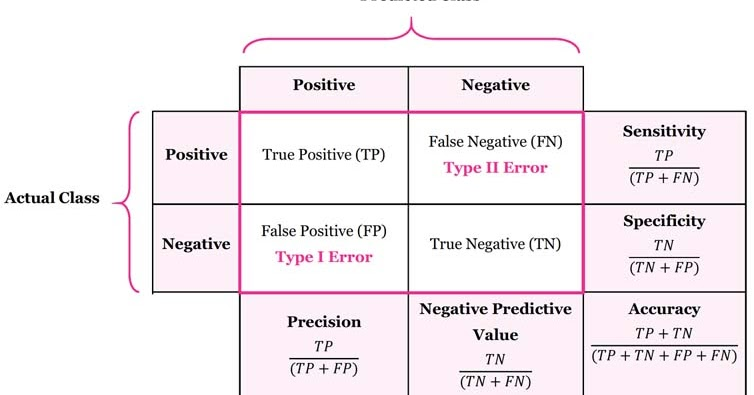

Accuracy:- TP+TN/(N)
Error:- FP+FN/(N)

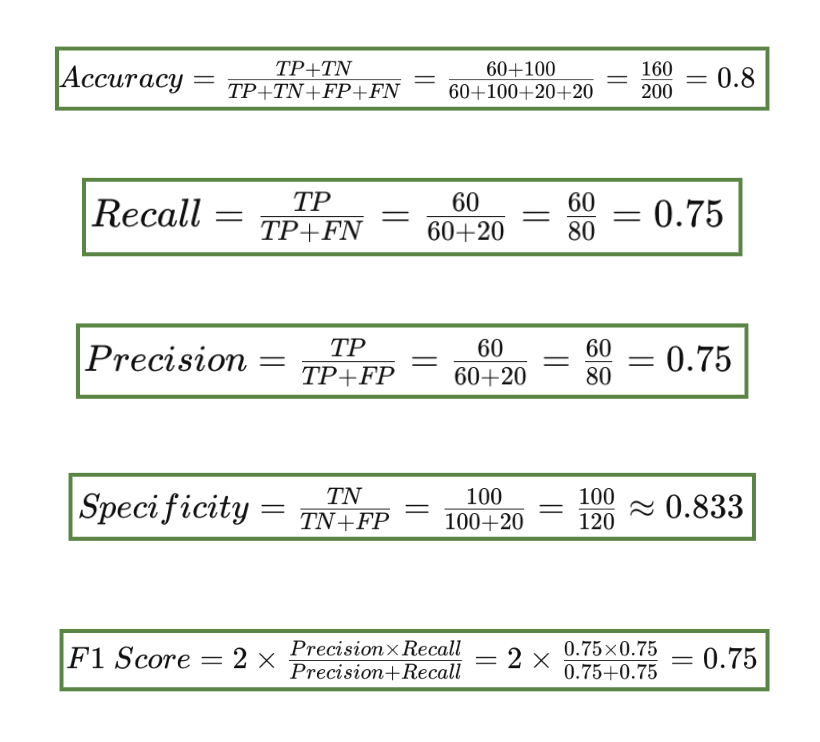

In [100]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score

In [102]:
y_pred = model.predict(X_test)

In [103]:
confusion_matrix(y_test,y_pred)

array([[ 7,  1],
       [ 1, 11]], dtype=int64)

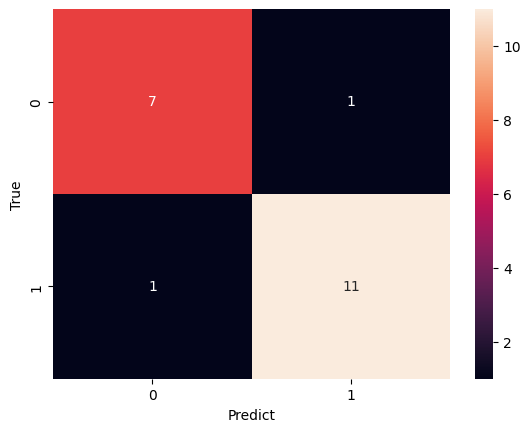

In [105]:
import matplotlib.pyplot as plt
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.xlabel('Predict')
plt.ylabel('True')
plt.show()

In [107]:
precision_score(y_test,y_pred)

0.9166666666666666

In [108]:
recall_score(y_test,y_pred)

0.9166666666666666

In [109]:
f1_score(y_test,y_pred)

0.9166666666666666

In [110]:
df = pd.read_csv(r"C:\Users\Lenovo\Downloads\Position_Salaries.csv")
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [112]:
from sklearn.preprocessing import PolynomialFeatures

<Axes: >

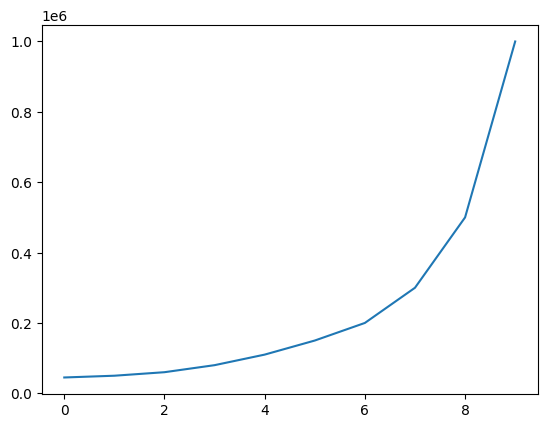

In [113]:
df['Salary'].plot()

In [117]:
pf = PolynomialFeatures(degree=2)
X = pf.fit_transform(df[['Level']])

In [119]:
y = df['Salary']
y

0      45000
1      50000
2      60000
3      80000
4     110000
5     150000
6     200000
7     300000
8     500000
9    1000000
Name: Salary, dtype: int64

In [120]:
from sklearn.linear_model import LinearRegression

In [121]:
le = LinearRegression()

In [122]:
le.fit(X,y)

LinearRegression()

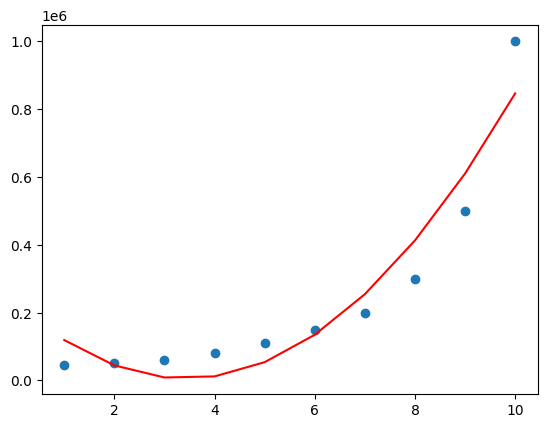

In [130]:
plt.scatter(df['Level'],df['Salary'])
plt.plot(df['Level'],le.predict(X),color='r')

In [134]:
le.predict(pf.transform([[11]]))

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([1121833.33333333])

In [135]:
# Regularization Technique

In [136]:
# L1:- Lasso
# L2:- Ridge
# # important in feature selection and reduce overfitting

In [137]:
# L1:- Feature Selection